# 概要
SLAMおよびロボットの自動運転について調べたことや理論の理解に必要そうな内容を示していく。また、pythonのサンプルコードも同時に示す。

# 事前知識

## 数学的基礎

### 行列とベクトル
- 行列
- 転置行列
- 一次独立: その列ベクトルが他の列ベクトルの線形和で表せないこと  
[線形代数における1次独立と1次従属についてわかりやすく解説する](https://linear-algebra.com/entry/linearly-independent)

- 単位行列
- 逆行列: $AB = 単位行列$となるような行列B。$B = A^{-1}$
- 対照行列: $A = A^T$となる行列
- 行列式
- 固有値・固有ベクトル: 正方行列Aに対して、$Au = \lambda u$を満たす$\lambda$を固有値、$u$を固有ベクトルという。行列に行列をかけて、実数と行列の積と等しくなるときの行列と実数。  
固有値は$|A - \lambda I| = 0$の解。$A$が$n$次対称行列のとき、その固有値と固有ベクトルをそれぞれ$\lambda_i$、$u_i$とすると、以下の式が成り立つ。これを$A$の**固有値分解**という。  
$$
\begin{aligned}
  A &= \sum_{i=1}^n \lambda_i u_i {u_i}^T \\
  A &= U\Lambda U^T \\
  U^T U &= U U^T = I \\
\end{aligned}
$$
ただし、
$$
\begin{aligned}
  U &= 
  \begin{pmatrix}
    u_1 & \dots & u_n \\
  \end{pmatrix}
  \\\\
  \Lambda &= 
  \begin{pmatrix}
    \lambda_1 & \dots & 0 \\
              & \ddots &  \\
    0         & \dots & \lambda_n \\
  \end{pmatrix}
\end{aligned}
$$
  - 正定値行列: すべての固有値が正の対称行列
  - 半正定値行列: すべての固有値が非負の対称行列

In [ ]:
import numpy as np

# 例として、2次の行列Aを定義
A = np.array([[4, 3],
              [2, 3]])
print(f"行列 A=\n{A}")

B = np.array([[5, 6],
              [7, 8]])

# 行列の加算
C = A + B
print(f"A + B=\n{C}")

# 行列の乗算
D = A @ B
print(f"A @ B=\n{D}")

# 行列のスカラー倍
E = A * 2
print(f"A * 2=\n{E}")

# 行列の除算
F = A @ np.linalg.inv(B)
print(f"A / B=\n{F}")

# 転置行列の計算
print(f"転置行列 A^T=\n{A.T}")

# 一次独立の判定: Aの列ベクトルが一次独立かどうかを判定
rank_A = np.linalg.matrix_rank(A)
print(f"Aの列ベクトルのランクは{rank_A}で、一次独立かどうかは{rank_A == A.shape[1]}")

# 単位行列の生成(2 x 2)
I = np.eye(2)
print(f"単位行列 I=\n{I}")

# 逆行列の計算
try:
  A_inv = np.linalg.inv(A)
  print(f"Aの逆行列 A^-1=\n{A_inv}")
  print(f"AA^-1=\n{np.dot(A, A_inv)}")
except np.linalg.LinAlgError:
  print("Aは逆行列を持たない")
  
# 対称行列かの判定
symmetric = np.allclose(A, A.T, atol=1e-8) # 数値計算での誤差を考慮して比較
print(f"Aは対称行列かどうかは{symmetric}")

# 行列式の計算
det_A = np.linalg.det(A)
print(f"Aの行列式は{det_A}")

# 固有値と固有ベクトルの計算
eigenvalues, eigenvectors = np.linalg.eig(A)
print(f"Aの固有値は{eigenvalues}")
print(f"Aの固有ベクトルは{eigenvectors}")

# 正定値行列かの判定。対称行列かの判定もしたほうがいい
is_positive_definite = np.all(np.linalg.eigvals(A) > 0)
print(f"Aは正定値行列かどうかは{is_positive_definite}")

# 半正定値行列かの判定。対称行列かの判定もしたほうがいい
is_positive_semidefinite = np.all(np.linalg.eigvals(A) >= 0)
print(f"Aは半正定値行列かどうかは{is_positive_semidefinite}")

行列 A=
[[4 3]
 [2 3]]
A + B=
[[ 9  9]
 [ 9 11]]
A @ B=
[[41 48]
 [31 36]]
A * 2=
[[8 6]
 [4 6]]
A / B=
[[-5.5  4.5]
 [ 2.5 -1.5]]
転置行列 A^T=
[[4 2]
 [3 3]]
Aの列ベクトルのランクは2で、一次独立かどうかはTrue
単位行列 I=
[[1. 0.]
 [0. 1.]]
Aの逆行列 A^-1=
[[ 0.5        -0.5       ]
 [-0.33333333  0.66666667]]
AA^-1=
[[ 1.00000000e+00 -1.11022302e-16]
 [ 5.55111512e-17  1.00000000e+00]]
Aは対称行列かどうかはFalse
Aの行列式は6.0
Aの固有値は[6. 1.]
Aの固有ベクトルは[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]
Aは正定値行列かどうかはTrue
Aは半正定値行列かどうかはTrue


### 内積とノルム
- 内積  
$a \cdot b = a^T b = \sum_{i=1}^{n} a_i b_i$
- $n$次元ベクトル$x$の**ノルム**$||x||$は次のように定義される。ただし、$A$は$m \times n$行列  
$$
\begin{aligned}
  ||x|| &= \sqrt{x^T x} \\
  ||Ax|| &= \sqrt{(Ax)^T Ax} = \sqrt{x^T (A^T A)x}
\end{aligned}
$$
- $n$次元ベクトルの**重み付きノルム**は次のように定義される。$W$は$n$次元正方行列で、**重み行列**という  
$$
||x||w = \sqrt{x^T Wx} \\
$$
- 重みつきノルムの一種に**マハラノビス距離**がある。$\sum$を共分散行列として、　次のように定義される  
$$
||x_1 - x_2||_{\Sigma^{-1}} = \sqrt{(x_1 - x_2)^T \Sigma^{-1} (x_1 - x_2)}
$$

In [ ]:
import numpy as np

A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

# 内積の計算
ip = A.T @ B
print(f"A・B = {ip}")

# ベクトルのノルムの計算
norm_A = np.sqrt(A.T @ A)
print(f"||A|| = {norm_A}")

_A = np.array([[1, 2, 0],
               [0, 1, 3]])
x = np.array([1, 0, -1])
norm_Ax = np.sqrt((_A @ x).T @ _A @ x)
print(f"||Ax|| = {norm_Ax}")

# 重みつきノルムの例: Wを正定値行列として定義
W = np.array([[2, 0, 0],
              [0, 3, 0],
              [0, 0, 4]])
norm_w = np.sqrt(x.T @ W @ x)
print(f'||x||w = {norm_w}')

# マハラノビス距離の例: 共分散行列Sigmaを定義
# ここでは例として対角行列を共分散行列とする
cov = np.array([[1, 0, 0],
                [0, 2, 0],
                [0, 0, 3]])
# 2つのベクトルの例
x1 = np.array([1, 2, 3])
x2 = np.array([4, 0, -1])
mahalanobis_distance = np.sqrt((x1 - x2).T @ np.linalg.inv(cov) @ (x1 - x2))
print(f"マハラノビス距離 ||x1 - x2||_Sigma^-1 = {mahalanobis_distance}")

A・B = 32
||A|| = 3.7416573867739413
||Ax|| = 3.1622776601683795
||x||w = 2.449489742783178
マハラノビス距離 ||x1 - x2||_Sigma^-1 = 4.041451884327381


### 微分
- ベクトルの微分
  - 最小二乗法や誤差伝搬で使う
$$
\begin{aligned}
  \frac{\partial (x^T a)}{\partial x} &= a \\
  \frac{\partial (a^T x)}{\partial x} &= a \\
  \frac{\partial (x^T Ax)}{\partial x} &= (A + A^T)x \\
  \frac{\partial ||Ax||^2}{\partial x} &= \frac{\partial (x^T (A^T A)x)}{\partial x} = 2(A^T A)x
\end{aligned}
$$
- 入出力がベクトルの関数$f(x) = (f_1(x) \dots f_m(x))^T$を$x$で偏微分した行列を**ヤコビ行列**といい、次のように定義される  
$$
J = \frac{\partial f}{\partial x} = 
\begin{pmatrix}
  \frac{\partial f_1}{\partial x_1} & \dots & \frac{\partial f_1}{\partial x_n} \\
   & \ddots & \\
  \frac{\partial f_m}{\partial x_1} & \dots & \frac{\partial f_m}{\partial x_n} \\
\end{pmatrix}
$$
- 他変数の1次元関数$f(x)$を$x$で2回微分した行列は**ヘッセ行列**といい、以下のように定義される  
$$
H = 
\begin{pmatrix}
  \frac{\partial^2 f}{\partial {x_1}^2} & \dots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
   & \ddots & \\
  \frac{\partial^2 f}{\partial x_n \partial x_1} & \dots & \frac{\partial^2 f}{\partial {x_n}^2}
\end{pmatrix}
$$

In [ ]:
import sympy as sp

# ベクトルの微分の例
x1, x2 = sp.symbols('x1 x2')
a1, a2 = sp.symbols('a1 a2')

# xとaを列ベクトルとして定義
x = sp.Matrix([x1, x2])
a = sp.Matrix([a1, a2])

# 2x2のシンボリック行列Aを定義
A11, A12, A21, A22 = sp.symbols('A11 A12 A21 A22')
A = sp.Matrix([[A11, A12],
               [A21, A22]])

# 1. 内積x^T aのxによる微分
expr1 = x.transpose() * a # 1x1の行列（スカラー）
grad_expr1 = sp.Matrix([sp.diff(expr1[0], var) for var in x])
print("1. 内積 x^T a の x による微分:")
sp.pprint(grad_expr1)

# 2. 内積a^T xのxによる微分
expr2 = a.transpose() * x
grad_expr2 = sp.Matrix([sp.diff(expr2[0], var) for var in x])
print("\n2. 内積 a^T x の x による微分:")
sp.pprint(grad_expr2)

# 3. 二次形式 x^T A xのxによる微分
expr3 = x.transpose() * A * x
grad_expr3 = sp.Matrix([sp.diff(expr3[0], var) for var in x])
expected_expr3 = (A + A.transpose()) * x
print("\n3. 二次形式 x^T A x の x による微分 (計算結果):")
sp.pprint(grad_expr3)
print("\n   二次形式 x^T A x の x による微分 (期待される結果 (A + A^T)x):")
sp.pprint(expected_expr3)

# 4. ||Ax||^2のxによる微分
expr4 = x.transpose() * (A.transpose() * A) * x
grad_expr4 = sp.Matrix([sp.diff(expr4[0], var) for var in x])
expected_expr4 = 2 * (A.transpose() * A) * x
print("\n4. ||Ax||^2 の x による微分 (計算結果):")
sp.pprint(grad_expr4)
print("\n   ||Ax||^2 の x による微分 (期待される結果 2(A^T A)x):")
sp.pprint(expected_expr4)

1. 内積 x^T a の x による微分:
⎡a₁⎤
⎢  ⎥
⎣a₂⎦

2. 内積 a^T x の x による微分:
⎡a₁⎤
⎢  ⎥
⎣a₂⎦

3. 二次形式 x^T A x の x による微分 (計算結果):
⎡2⋅A₁₁⋅x₁ + A₁₂⋅x₂ + A₂₁⋅x₂⎤
⎢                          ⎥
⎣A₁₂⋅x₁ + A₂₁⋅x₁ + 2⋅A₂₂⋅x₂⎦

   二次形式 x^T A x の x による微分 (期待される結果 (A + A^T)x):
⎡2⋅A₁₁⋅x₁ + x₂⋅(A₁₂ + A₂₁)⎤
⎢                         ⎥
⎣2⋅A₂₂⋅x₂ + x₁⋅(A₁₂ + A₂₁)⎦

4. ||Ax||^2 の x による微分 (計算結果):
⎡     ⎛   2      2⎞                           ⎤
⎢2⋅x₁⋅⎝A₁₁  + A₂₁ ⎠ + 2⋅x₂⋅(A₁₁⋅A₁₂ + A₂₁⋅A₂₂)⎥
⎢                                             ⎥
⎢                                ⎛   2      2⎞⎥
⎣2⋅x₁⋅(A₁₁⋅A₁₂ + A₂₁⋅A₂₂) + 2⋅x₂⋅⎝A₁₂  + A₂₂ ⎠⎦

   ||Ax||^2 の x による微分 (期待される結果 2(A^T A)x):
⎡   ⎛     2        2⎞                             ⎤
⎢x₁⋅⎝2⋅A₁₁  + 2⋅A₂₁ ⎠ + x₂⋅(2⋅A₁₁⋅A₁₂ + 2⋅A₂₁⋅A₂₂)⎥
⎢                                                 ⎥
⎢                                ⎛     2        2⎞⎥
⎣x₁⋅(2⋅A₁₁⋅A₁₂ + 2⋅A₂₁⋅A₂₂) + x₂⋅⎝2⋅A₁₂  + 2⋅A₂₂ ⎠⎦


### 点の座標変換
- センサから得られる位置情報は相対位置
- ロボットがほしいのは絶対位置
- センサ座標系での計測位置: $\boldsymbol{Q_1}$  
世界座標系での計測位置: $\boldsymbol{Q_2}$  
回転行列: $ \boldsymbol{R} = \begin{pmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \\ \end{pmatrix} $  
ロボットの位置: $\boldsymbol{A}$  
このとき、  
$$
\begin{aligned}
  \boldsymbol{Q_2} &= \boldsymbol{R} \boldsymbol{Q_1} + \boldsymbol{A} \\
  \boldsymbol{Q_1} &= \boldsymbol{R^T} (\boldsymbol{Q_2} - \boldsymbol{A}) \\
\end{aligned}
$$

theta = 45.0
Q_2 = [-0.82842712 10.48528137]
Q_1 = [4. 8.]


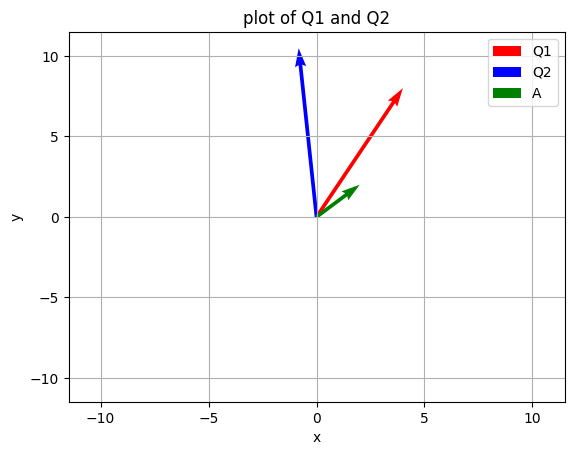

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Q_1 = np.array([4, 8])
A = np.array([2, 2])
theta = np.atan2(A[0], A[1])
print(f"theta = {np.degrees(theta)}")
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

Q_2 = R @ Q_1 + A
print(f"Q_2 = {Q_2}")

Q_1 = R.T @ (Q_2 - A)
print(f"Q_1 = {Q_1}")

origin = np.array([0, 0])
fig, ax = plt.subplots()

# Q1を赤色の矢印としてプロット
ax.quiver(origin[0], origin[1], Q_1[0], Q_1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Q1')

# Q2を青色の矢印としてプロット
ax.quiver(origin[0], origin[1], Q_2[0], Q_2[1], angles='xy', scale_units='xy', scale=1, color='b', label='Q2')

# ロボットの初期位置を緑の矢印としてプロット
ax.quiver(origin[0], origin[1], A[0], A[1], angles='xy', scale_units='xy', scale=1, color='g', label='A')

# 軸範囲を両ベクトルの最大値に合わせて設定
all_coords = np.concatenate((Q_1, Q_2))
limit = np.max(np.abs(all_coords)) + 1
ax.set_xlim([-limit, limit])
ax.set_ylim([-limit, limit])

# 軸ラベルとグリッドの設定
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('plot of Q1 and Q2')
ax.grid(True)
ax.legend()

# グラフの表示
plt.show()

### ロボット位置の座標変換
- ロボット位置の座標変換は方向を持つため点の座標変換よりも複雑になる
- ロボットが位置$\boldsymbol{x_1} = (x_1, y_1, \theta_1)^T$から$\boldsymbol{a} = (u, v, \phi)^T$だけ移動したときに移動先の位置$\boldsymbol{x_2} = (x_2, y_2, \theta_2)^T$は次のように計算される  
$$
\begin{aligned}
\begin{pmatrix}
  x_2 \\
  y_2 \\
  \theta_2\\
\end{pmatrix}
&=
\begin{pmatrix}
  cos\theta_1 & -sin\theta_1 & 0 \\
  sin\theta_1 & cos\theta_1 & 0 \\
  0 & 0 & 1\\
\end{pmatrix}
\begin{pmatrix}
  u \\
  v \\
  \phi \\
\end{pmatrix}
+
\begin{pmatrix}
  x_1 \\
  y_1 \\
  \theta_1 \\
\end{pmatrix}
\\
\boldsymbol{x_2} &= \boldsymbol{R} \boldsymbol{a} + \boldsymbol{x_1} \\
\boldsymbol{R} &=
\begin{pmatrix}
  cos\theta_1 & -sin\theta_1 & 0 \\
  sin\theta_1 & cos\theta_1 & 0 \\
  0 & 0 & 1\\
\end{pmatrix}
\end{aligned}
$$
- 逆にロボットが$\boldsymbol{x_1}$から$\boldsymbol{x_2}$に移動したことがわかっている場合、その移動量$\boldsymbol{a}$は
$$
\boldsymbol{a} = R^T (\boldsymbol{x_2} - \boldsymbol{x_1})
$$

移動後の位置 x2: [2.70710678 3.70710678 0.95993109]
逆変換で再計算した移動量 a: [1.00000000e+00 1.00875766e-16 1.74532925e-01]


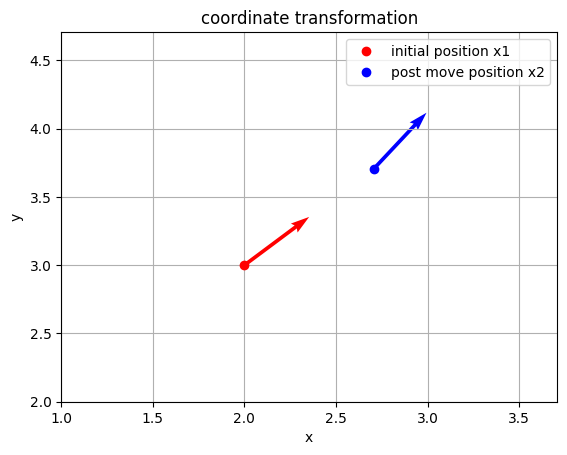

In [ ]:
# プログラム書くのめんどくせぇ
import numpy as np
import matplotlib.pyplot as plt

# ロボットの初期位置
x1 = np.array([2.0, 3.0, np.deg2rad(45)])

# ローカル座標系での移動量
a = np.array([1.0, 0.0, np.deg2rad(10)])

# 正変換により移動後のロボット位置x2を計算
theta1 = x1[2]
R = np.array([[np.cos(theta1), -np.sin(theta1), 0],
              [np.sin(theta1),  np.cos(theta1), 0],
              [0,               0,              1]])
x2 = R @ a + x1
print("移動後の位置 x2:", x2)

# 逆変換により移動量aを計算
a_calc = R.T @ (x2 - x1)
print("逆変換で再計算した移動量 a:", a_calc)

fig, ax = plt.subplots()
    
# 初期位置 x1 と移動後位置 x2 を点としてプロット
ax.plot(x1[0], x1[1], 'ro', label='initial position x1')
ax.plot(x2[0], x2[1], 'bo', label='post move position x2')

# ロボットの向きを示す矢印をプロット
arrow_length = 0.5  # 矢印の長さ（適宜調整してください）

# 初期位置 x1 の向き
dx1 = arrow_length * np.cos(x1[2])
dy1 = arrow_length * np.sin(x1[2])
# 移動後位置 x2 の向き
dx2 = arrow_length * np.cos(x2[2])
dy2 = arrow_length * np.sin(x2[2])
# 移動量aの向き
dax = arrow_length * np.cos(a[2])
day = arrow_length * np.sin(a[2])

ax.quiver(x1[0], x1[1], dx1, dy1, angles='xy', scale_units='xy', scale=1, color='r')
ax.quiver(x2[0], x2[1], dx2, dy2, angles='xy', scale_units='xy', scale=1, color='b')

# 軸ラベル、タイトル、グリッド、凡例の設定
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('coordinate transformation')
ax.grid(True)
ax.legend()

# 軸の範囲設定（両位置を含むように調整）
x_min = min(x1[0], x2[0]) - 1
x_max = max(x1[0], x2[0]) + 1
y_min = min(x1[1], x2[1]) - 1
y_max = max(x1[1], x2[1]) + 1
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

plt.show()

### 最小二乗法
- 線形の場合
- 非線形の場合
  - 関数をテイラー展開して線形の最小二乗問題に近似して方程式を解く
  - 得られた解を使用して値が収束するまで計算を続ける
- ガウス-ニュートン法
- 重みつき最小二乗法
  - 重みつき二乗ノルムを最小化する問題
- SLAMで重要なのは、マハラノビス距離のもとでの重みつき最小二乗問題

線形最小二乗法で推定されたパラメータ(a, b) = [2.35883775 1.84637052]
重み付き最小二乗法で推定されたパラメータ(a, b) = [2.36142914 1.83251454]
非線形最小二乗法で推定されたパラメータ(a, b) = [2.86960668 0.20663656]


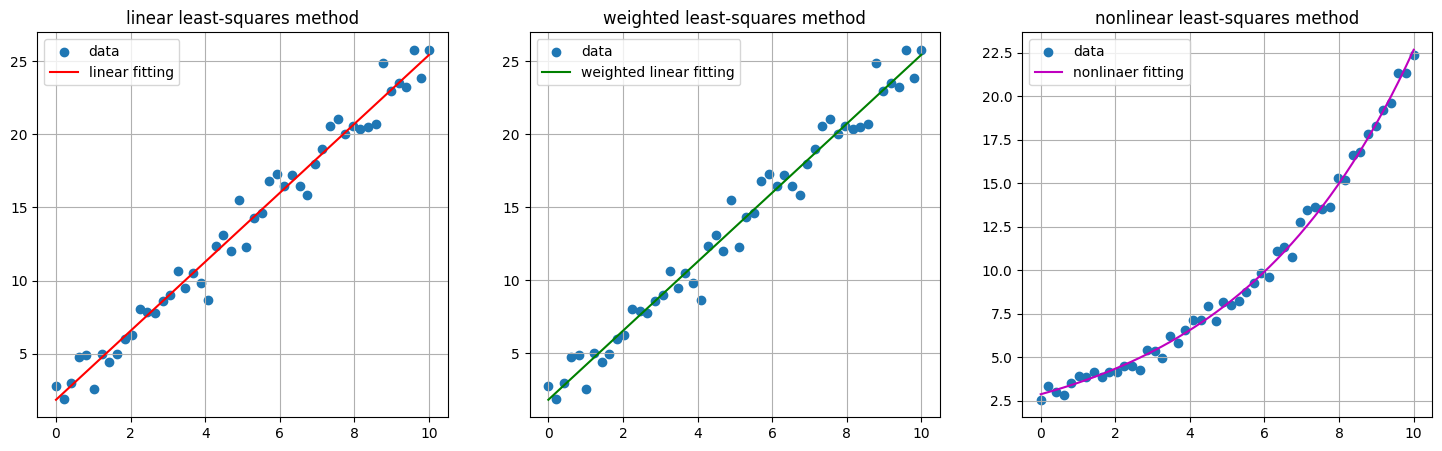

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# サンプルデータの作成（再現性のため算数シードを設定）
np.random.seed(0)
x = np.linspace(0, 10, 50)

# --- 結果のプロット ---
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# 線形最小二乗法
# 真のモデル: y = 2.5x + 1.0
true_a, true_b = 2.5, 1.0
y_linear = true_a * x + true_b + np.random.normal(scale=1.0, size=x.shape)
X = np.vstack([x, np.ones(len(x))]).T # xと定数項からなる設計行列
params, residuals, rank, s = np.linalg.lstsq(X, y_linear, rcond=None)
print(f"線形最小二乗法で推定されたパラメータ(a, b) = {params}")
# 線形最小二乗法の結果プロット
ax[0].scatter(x, y_linear, label="data")
ax[0].plot(x, params[0]*x + params[1], 'r-', label="linear fitting")
ax[0].set_title("linear least-squares method")
ax[0].legend()
ax[0].grid(True)

# 重みつき最小二乗法
# 例として、各データに対して異なる重み（例: 重みは1から1.5の範囲）を設定
weights = np.linspace(1, 1.5, len(x))
W = np.sqrt(weights) # 重みの平方根を計算
X = np.vstack([x, np.ones(len(x))]).T
X_W = X * W[:, np.newaxis] # 各行に重みをかける
Y_W = y_linear * W
params, residuals, rank, s = np.linalg.lstsq(X_W, Y_W, rcond=None)
print(f"重み付き最小二乗法で推定されたパラメータ(a, b) = {params}")
# 重み付き最小二乗法の結果プロット
ax[1].scatter(x, y_linear, label="data")
ax[1].plot(x, params[0]*x + params[1], 'g-', label="weighted linear fitting")
ax[1].set_title("weighted least-squares method")
ax[1].legend()
ax[1].grid(True)

# 非線形最小二乗法
# 非線形モデルの真のパラメータ: y = 3.0exp(0.2x)
true_a_nl, true_b_nl = 3.0, 0.2
y_nonlinear = true_a_nl * np.exp(true_b_nl * x) + np.random.normal(scale=0.5, size=x.shape)
def nonlinear_model(x, a, b):
  return a * np.exp(b * x)
popt, pcov = curve_fit(nonlinear_model, x, y_nonlinear, p0=(1, 0.1)) # 初期値を与えながらパラメータ推定
print(f"非線形最小二乗法で推定されたパラメータ(a, b) = {popt}")
# 非線形最小二乗法の結果プロット
ax[2].scatter(x, y_nonlinear, label="data")
ax[2].plot(x, nonlinear_model(x, *popt), 'm-', label="nonlinaer fitting")
ax[2].set_title("nonlinear least-squares method")
ax[2].legend()
ax[2].grid(True)

plt.show()


### 確率密度と確率
- SLAMで扱う確率はほとんどが「連続値の確率」
- 確率変数が連続値のとき確率密度と言う
- 確率密度$p(x)$を一定区間$[a, b]$で積分すると確率$P$が得られる。$[\infty, -\infty]$だと1になる  
$$
P(a \leq X \leq b) = \int_a^b p(x)dx
$$
- 確率分布は、確率変数の値の区間を入れるとその確率を出す関数。確率密度が決まれば確立分布が決まる
- 重要な理論
  - 条件付き確率: yが起こる条件のもとでxが起こる確率
  $$
  p(x|y) = \frac{p(x, y)}{p(y)}
  $$
  - 周辺確率: x, y事象が起こりうる環境でxが起こる確率。
  $$
  p(x) = \int_{-\infty}^{\infty} p(x, y)dy
  $$
  - 全確率の定理
  $$
  p(x) = \int_{-\infty}^{\infty} p(x|y)p(y)dy
  $$
  - ベイズの定理
  $$
  p(x|y) = \frac{p(y|x)p(x)}{p(y)}
  $$

### 正規分布
$$
p(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left\{{-\frac{(x - \bar{x})^2}{2\sigma^2}}\right\}
$$
- $\bar{x}$: 平均
- $\sigma^2$: 分散
- 正規分布の他にSLAMでよく使われる確率分布として**一様分布**がある

### 誤差の解析
- 偶然誤差: 統計学で扱える
- 系統誤差: 校正や補正で対処する
- 間違い誤差: コンピュータもたまには間違う。データの対応づけで間違える可能性がある

### 誤差の伝搬
- もうめんどくせぇ